### GRIP Task#2 :
  * K- Means Clustering on IRIS DATASET

### Author: Prasanth A B.

#### About the dataset
   * This dataset contains 3 classes of 50 instances each and each class refers to a type of iris plant. 
   * The dataset has four features: sepal length, sepal width, petal length, and petal width. 
   * The fifth column is for species, which holds the value for these types of plants.

In [1]:
# Importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
import warnings                                                                 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


* Dataset consists 5 Numerical Features about the dimensions of Petals and Sepals of the flower
* One categorical Feature about the species of the Flower 

#### Data Pre-Processing

##### Checking for Missing Values

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

* There is no missing Values in our dataset

In [6]:
num_df = df.select_dtypes(include = np.number)
cat_df = df.select_dtypes(exclude = np.number)

In [7]:
num_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


##### Scaling our data using MinMax Scaler

In [8]:

msc=MinMaxScaler()
df_scaled=pd.DataFrame(msc.fit_transform(num_df),columns=num_df.columns)

In [9]:
df_scaled.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.000000,0.222222,0.625000,0.067797,0.041667
1,0.006711,0.166667,0.416667,0.067797,0.041667
2,0.013423,0.111111,0.500000,0.050847,0.041667
3,0.020134,0.083333,0.458333,0.084746,0.041667
4,0.026846,0.194444,0.666667,0.067797,0.041667


### K - Means Clustering

#### WCSS (Within-Cluster Sum of Square).

 * WCSS is the sum of squared distance between each point and the centroid in a cluster.
 

In [10]:
wcss=[]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

In [41]:
print(wcss)

[53.80595725787708, 16.361197253631723, 9.009479719589137, 7.707242245997061, 6.418592007772026, 5.456373155697733, 4.868952185377474, 4.613761709016226, 4.260361371302423]


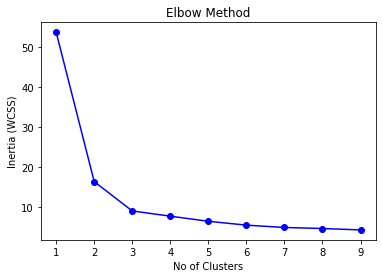

In [45]:
plt.plot(range(1,10),wcss,color='blue',marker = 'o')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method')
plt.show()

* From the reference of above graph 
* We interfere the curve elbow at No of cluster = 3 
* Hence we can use n_clusters as 3 to do our k means clustering

In [13]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(df_scaled)
labels=kmeans.predict(df_scaled)

In [14]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
df_k['kmeans_labels']=labels

In [17]:
df_k.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,kmeans_labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1


##### Visualization with Labels 

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

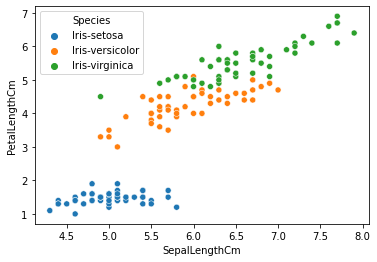

In [38]:
sns.scatterplot(df_k['SepalLengthCm'],df_k['PetalLengthCm'],hue=df_k['Species'])


<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

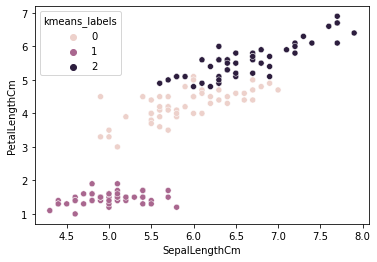

In [25]:
sns.scatterplot(df_k['SepalLengthCm'],df_k['PetalLengthCm'],hue=df_k['kmeans_labels'])

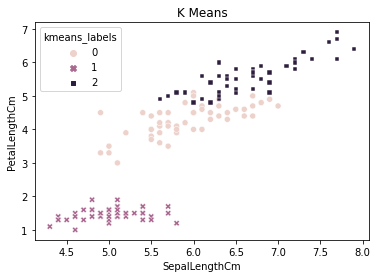

In [30]:
# Kmeans
plt.title('K Means')
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',hue='kmeans_labels',style='kmeans_labels',data=df_k)
plt.show()

###### Silhouette Score

In [27]:
silhouette_score(df_scaled,kmeans.labels_)

0.5203621486676548

* K means cluster with n components 3 groups classified our dataset into three groups 0 , 1 , 2 
* Lets us check for the Accuracy of our clustering by building model with Desicion Tree Classifier

In [18]:
df_k['kmeans_labels'].value_counts()

0    53
1    50
2    47
Name: kmeans_labels, dtype: int64

In [19]:
df_k['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

##### Model Building using Desicion Tree Classifier

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [32]:
df_scaled.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [33]:
inputs = df_scaled

In [34]:
target1 = df_k['kmeans_labels']

In [35]:
 
xtrain,xtest,ytrain,ytest = train_test_split(inputs,target1,test_size = 0.3 , random_state =0)
DT = DecisionTreeClassifier(max_depth=50,random_state=0)
DT.fit(xtrain,ytrain)
ypred = DT.predict(xtest)
print('Accuracy of K Means Clustering:',round(DT.score(xtest,ytest)*100,2),'%')

Accuracy of K Means Clustering: 97.78 %


* We classified our Iris dataset in 3 groups by K Means clustering 
* Accuracy of our Clustering determined by Decision Tree Classifier is 97.78 % 